In the following project, we have chosen to examine GDP per capita in selected countries from the European Union, in the period 2010-2019. Annual growth rates for the whole period are calculated to acess which countries that rise and decline the most in GDP. Givem this accessment, we draw parralels to the population growth in the chosen countries and thereby explain the difference in GDP growth-rates. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import ipywidgets as widgets
from matplotlib_venn import venn2 # install with pip install matplotlib-venn
from pandas_datareader import wb

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

In [3]:
filename = 'data/EUGDP.xlsx'

In the following we have a sample of 38 countries, which are located in Europe. 

In [4]:
pd.read_excel(filename)

,Country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Belgium,363140,375968,386175,392880.0,403003.3,416701.4,430372.1,446364.9,459819.8,473639
1,Bulgaria,38044.1,41252.6,42033.5,41885.4,42876.1,45675.8,48620.5,52310.0,56086.9,60675.3
2,Czechia,156718,164040,161434,157741.6,156660.0,168473.3,176370.1,191721.8,207570.3,219896
3,Denmark,243165,247880,254578,258742.7,265757.0,273017.6,283109.7,292408.0,301340.9,310576
4,Germany,2564400,2693560,2745310,2811350.0,2927430.0,3030070.0,3134100.0,3244990.0,3344370.0,3435760
5,Estonia,14860.7,16826.8,18050.7,19033.4,20180.0,20782.2,21693.6,23775.8,26035.9,28037.2
6,Ireland,167732,170827,175116,179661.3,194818.2,262833.4,271683.6,297130.8,324038.2,347215
7,Greece,226031,207029,191204,180654.3,178656.5,177258.4,176487.9,180217.6,184713.6,187456
8,Spain,1072709,1063763,1031099,1020348.0,1032158.0,1077590.0,1113840.0,1161878.0,1202193.0,1244757
9,France,1995289,2058369,2088804,2117189.0,2149765.0,2198432.0,2234129.0,2295063.0,2353090.0,2418997


We will look at the first 10 countries on that list, where we will inspect there 

In [5]:
EU_GDP=pd.read_excel(filename)
EUgdp=EU_GDP.head(10)
EUgdp

,Country,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Belgium,363140,375968,386175,392880.0,403003.3,416701.4,430372.1,446364.9,459819.8,473639
1,Bulgaria,38044.1,41252.6,42033.5,41885.4,42876.1,45675.8,48620.5,52310.0,56086.9,60675.3
2,Czechia,156718,164040,161434,157741.6,156660.0,168473.3,176370.1,191721.8,207570.3,219896
3,Denmark,243165,247880,254578,258742.7,265757.0,273017.6,283109.7,292408.0,301340.9,310576
4,Germany,2564400,2693560,2745310,2811350.0,2927430.0,3030070.0,3134100.0,3244990.0,3344370.0,3435760
5,Estonia,14860.7,16826.8,18050.7,19033.4,20180.0,20782.2,21693.6,23775.8,26035.9,28037.2
6,Ireland,167732,170827,175116,179661.3,194818.2,262833.4,271683.6,297130.8,324038.2,347215
7,Greece,226031,207029,191204,180654.3,178656.5,177258.4,176487.9,180217.6,184713.6,187456
8,Spain,1072709,1063763,1031099,1020348.0,1032158.0,1077590.0,1113840.0,1161878.0,1202193.0,1244757
9,France,1995289,2058369,2088804,2117189.0,2149765.0,2198432.0,2234129.0,2295063.0,2353090.0,2418997


In [6]:
myDict = {}
for i in range(2010, 2020): # range goes from 2010 to but not including 2017
    myDict[str(i)] = f'e{i}' 
myDict

{'2010': 'e2010',
 '2011': 'e2011',
 '2012': 'e2012',
 '2013': 'e2013',
 '2014': 'e2014',
 '2015': 'e2015',
 '2016': 'e2016',
 '2017': 'e2017',
 '2018': 'e2018',
 '2019': 'e2019'}

In [19]:
EUgdp.rename(columns = myDict, inplace=True)
EUgdp

,Country,e2010,e2011,e2012,e2013,e2014,e2015,e2016,e2017,e2018,e2019
0,Belgium,363140,375968,386175,392880.0,403003.3,416701.4,430372.1,446364.9,459819.8,473639
1,Bulgaria,38044.1,41252.6,42033.5,41885.4,42876.1,45675.8,48620.5,52310.0,56086.9,60675.3
2,Czechia,156718,164040,161434,157741.6,156660.0,168473.3,176370.1,191721.8,207570.3,219896
3,Denmark,243165,247880,254578,258742.7,265757.0,273017.6,283109.7,292408.0,301340.9,310576
4,Germany,2564400,2693560,2745310,2811350.0,2927430.0,3030070.0,3134100.0,3244990.0,3344370.0,3435760
5,Estonia,14860.7,16826.8,18050.7,19033.4,20180.0,20782.2,21693.6,23775.8,26035.9,28037.2
6,Ireland,167732,170827,175116,179661.3,194818.2,262833.4,271683.6,297130.8,324038.2,347215
7,Greece,226031,207029,191204,180654.3,178656.5,177258.4,176487.9,180217.6,184713.6,187456
8,Spain,1072709,1063763,1031099,1020348.0,1032158.0,1077590.0,1113840.0,1161878.0,1202193.0,1244757
9,France,1995289,2058369,2088804,2117189.0,2149765.0,2198432.0,2234129.0,2295063.0,2353090.0,2418997


In [8]:
EUgdp_tall = pd.wide_to_long(EUgdp, stubnames='e', i='Country', j='year')
EUgdp_tall.head(10);

In [9]:
EUgdp_tall = EUgdp_tall.reset_index()

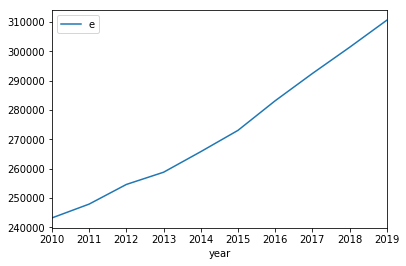

In [10]:
EUgdp_tall.loc[EUgdp_tall['Country'] == 'Denmark', :].plot(x='year',y='e')

In [11]:
import ipywidgets as widgets
def plot_e(Dataframe, Country): 
    I = Dataframe['Country'] == Country
    
    ax=Dataframe.loc[I,:].plot(x='year',y='e', style='-o', legend='False')
    ax.set_ylabel('GDP per capita')
    ax.set_title("GDP per capita 2010-2019 for selected countries in Europe")

In [12]:
widgets.interact(plot_e, 
    Dataframe = widgets.fixed(EUgdp_tall),
    Country = widgets.Dropdown(description='Country', options=EUgdp_tall.Country.unique(), value='Denmark')
                ); 

interactive(children=(Dropdown(description='Country', index=3, options=('Belgium', 'Bulgaria', 'Czechia', 'Den…

From the plot above it is evident that severeal countries in the EU experience rising GDP over the couse of nine years. Although it is not all EU countries that have a positive growth in GDP. Greece is one of the few countries in the EU, and the only country in this sample, that have experienced ongoing decline in GDP. From the plot it can be seen that from at least the year 2010, the GDP has been consistently falling up until the year 2016. After this year the economic circumstances change, and the GDP is rising slowly. 
To investigate the rate of this decline, it would be interesting to calculate the annual growth rate for GDP for the whole period and thereafter analyze the economic circumstance during the time period and its relation to GDP. 

In [13]:
EUgdp1=EUgdp.copy()

In [14]:
def Annual_Growth_rate(EUgdp):
    return ((EUgdp['e2019']/EUgdp['e2010'])**(1/9)-1)*100
EUgdp1['Annual growth rate']=EUgdp1.apply(Annual_Growth_rate,axis=1)


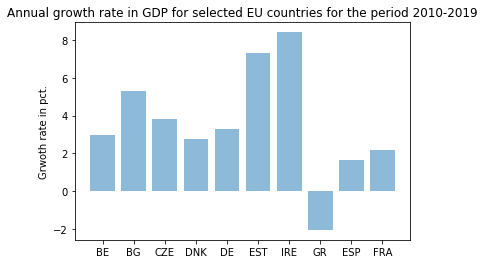

In [15]:
objects = ('BE', 'BG', 'CZE', 'DNK', 'DE', 'EST', 'IRE', 'GR', 'ESP', 'FRA')
y_pos = np.arange(len(objects))
performance = EUgdp1['Annual growth rate']

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Grwoth rate in pct.')
plt.title('Annual growth rate in GDP for selected EU countries for the period 2010-2019')

plt.show()

From the barplot above that the country with the most rapid growth in GDP is Ireland, and the country with the largest decline is Greece, as earlier mentioned. It would now be interesting to investigate which economic circumstances that have had the given effect on the Ireland and Greece.

In [16]:
regions = ['IRL', 'GRC']

In [17]:
pop = wb.download(indicator='SP.POP.TOTL', country=regions, start=2010, end=2018)
population=pop.rename(columns = {'SP.POP.TOTL' : 'population'})
population

population
country year            
Greece  2018    10727668
        2017    10754679
        2016    10775971
        2015    10820883
        2014    10892413
        2013    10965211
        2012    11045011
        2011    11104899
        2010    11121341
Ireland 2018     4853506
        2017     4807388
        2016     4755335
        2015     4701957
        2014     4657740
        2013     4623816
        2012     4599533
        2011     4580084
        2010     4560155

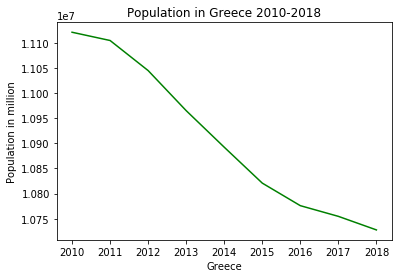

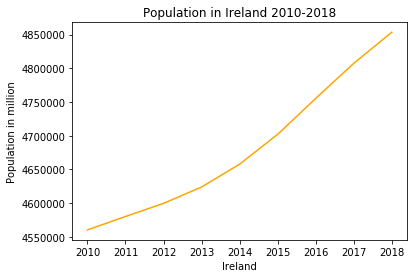

<Figure size 432x288 with 0 Axes>

In [18]:
year = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
pop_greece = [11121341, 11104899, 11045011, 10965211, 10892413, 10820883, 10775971, 10754679, 10727668]


plt.plot(year, pop_greece, color='g')
plt.xlabel('Greece')
plt.ylabel('Population in million')
plt.title('Population in Greece 2010-2018')
plt.show()

year = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
pop_Ireland =[4560155, 4580084, 4599533, 4623816, 4657740, 4701957, 4755335, 4807388, 4853506]
plt.plot(year, pop_Ireland, color='orange')
plt.xlabel('Ireland')
plt.ylabel('Population in million')
plt.title('Population in Ireland 2010-2018')
plt.show()
plt.tight_layout()

From the plots above, it is evident that the development in the population is very different for the two countries, hence the difference in annual GDP growth. 

Looking at the first plot, we see that the population for greece is declining. Greece has suffered severly from the economic crisis, which has lead to emigration, declining birth and an aging population. This results in lower GDP over the particular period.

For Ireland the situation is the absolute opposite. A rise in population has given rise to growing GDP over the period. A larger population can contribute to employment and thereby higher Gross Domestic Product. 